<a href="https://colab.research.google.com/github/HOWARD258ym/HOWARD258ym/blob/main/%E3%80%8Cback_propagation_practice_PyTorch_Class_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

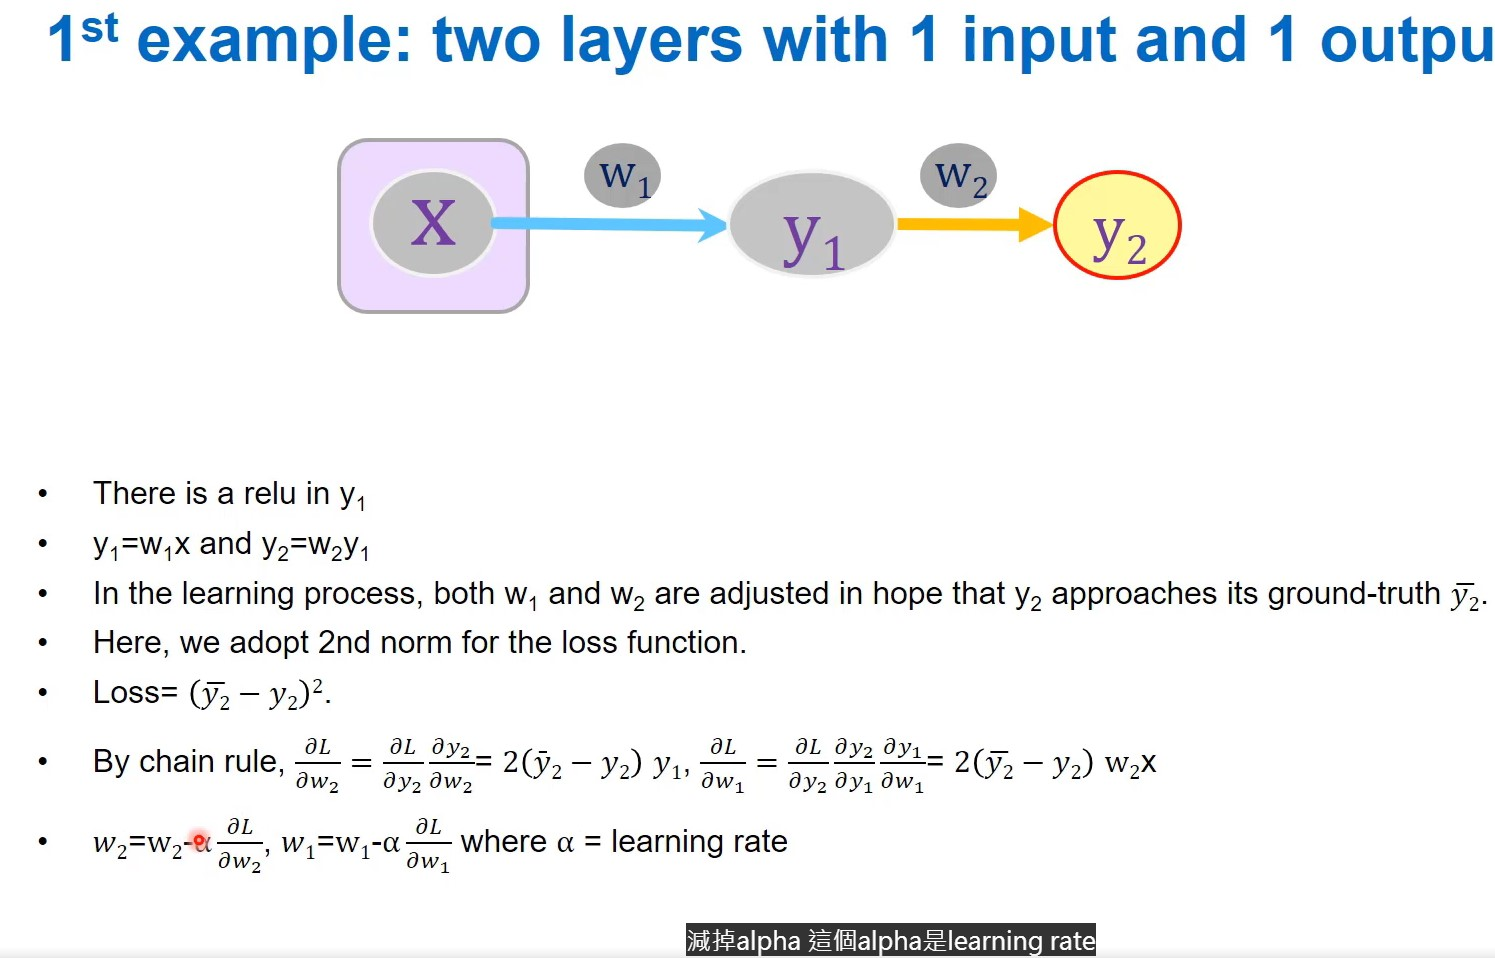

input=0.883893
goal of learning=2.000000
final w1=[[1.08958369]]
[0.20198989 0.20816415 0.21438915 0.22066619 0.2269966  0.23338167
 0.23982265 0.24632083 0.25287742 0.25949365 0.26617071 0.27290977
 0.27971198 0.28657846 0.2935103  0.30050856 0.30757429 0.31470848
 0.32191211 0.32918609 0.33653133 0.34394867 0.35143894 0.35900289
 0.36664126 0.3743547  0.38214385 0.39000927 0.39795147 0.40597092
 0.414068   0.42224303 0.4304963  0.43882799 0.44723823 0.45572706
 0.46429446 0.47294032 0.48166445 0.49046658 0.49934635 0.50830329
 0.51733688 0.52644645 0.53563127 0.5448905  0.55422318 0.56362828
 0.57310462 0.58265095 0.59226586 0.60194788 0.61169538 0.62150664
 0.63137981 0.64131293 0.65130391 0.66135056 0.67145053 0.6816014
 0.69180059 0.70204543 0.71233311 0.72266072 0.73302522 0.74342349
 0.75385226 0.76430817 0.77478778 0.78528751 0.79580371 0.80633265
 0.81687048 0.82741331 0.83795715 0.84849794 0.85903157 0.86955389
 0.88006066 0.89054765 0.90101056 0.91144508 0.9218469  0.9322116

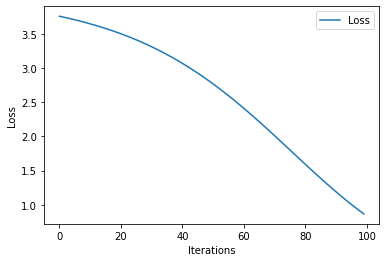

In [ ]:
# This example is written for demonstrating a two-layer CNN.
# Only a relu is put after the 1st layer.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

# fix random No.
np.random.seed(20)

# setting 1
x = np.random.randn(1, 1)
# setting 2
#x = np.array(0.5)
#x.reshape(1,1) # not necessary actually

# setting 1
# y2_GT = np.random.randn(1, 1)
# setting 2 ------ GOAL
y2_GT=np.array(2.0)
y2_GT.reshape(1,1)

print("input=%f"%x)
print("goal of learning=%f"%y2_GT)

# Randomly initialize weights
# setting 1
w1 = np.random.randn(1, 1)
w2 = np.random.randn(1, 1)
# setting 2
#w1 = np.array(0.2) #0.2
#w1 = w1.reshape(1,1)
#w2 = np.array(0.5) #0.5
#w2 = w2.reshape(1,1)

# setting 1
#learning_rate = 0.01 #0.01 is a good one
# setting 2
learning_rate = 0.1 
# setting 3
learning_rate = 0.005


iterations=100


# for displaying the variation of weighting of 1st layer and 2nd layer
w1_history= np.zeros(iterations)
w2_history= np.zeros(iterations)
# for displaying the output of the 1st layer
y1_history= np.zeros(iterations)
loss_history= np.zeros(iterations)
Inference_result_history= np.zeros(iterations)
#forward_result=[]



for t in range(iterations):
    # 1st layer inference
    y1 = x.dot(w1)
    # doing relu for the output of 1st layer
    # if y1_relu <０，ｔｈｅｎ　y1_relu　＝０
    y1_relu = np.maximum(y1, 0) 


    # store the output of the 1st layer
    y1_history[t]= y1_relu    

    # 2nd layer inference
    y2_pred = y1_relu.dot(w2)

    # output of the whole neural net
    Inference_result_history[t]=y2_pred

    # Compute the loss
    loss = np.square(y2_pred - y2_GT).sum()

    loss_history[t]=loss
    #print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y2_pred = 2.0 * (y2_pred - y2_GT) # d_loss/d_y2    
    grad_w2 = y1_relu.dot(grad_y2_pred) # (d_loss/d_y2)*(d_y2/d_w2)=d_loss/d_w2
    grad_y1_relu = grad_y2_pred.dot(w2) # (d_loss/d_y2)*(d_y2/d_y1)=d_loss/d_y1
    grad_y1 = grad_y1_relu.copy()
    grad_y1[y1 < 0] = 0 # only weightings through relu would be conducted back pass
    grad_w1 = x.dot(grad_y1) # (d_loss/d_y2)*(d_y2/d_y1)*(d_y1/d_w1)=(d_loss/d_y1)*(d_y1/d_w1)=d_loss/d_w1

    # Update weights
    w1 -= learning_rate * grad_w1  #w1=w1-learning_rate * grad_w1
    w2 -= learning_rate * grad_w2  #w2=w2-learning_rate * grad_w2

    w1_history[t]= w1
    w2_history[t]= w2

    # forward result of each iteration
    
# show data history

print("final w1={}".format(w1))
print(w1_history)
print("final w2={}".format(w2))
#print(w2_history)

print("final y2_pred={}".format(y2_pred))
print(Inference_result_history)

# create array [0,1,2~199]
input_epoch = np.array(range(iterations))

# for observing dead relu
# print y1_history

plt.plot(input_epoch,loss_history)
plt.legend(['Loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# 新增區段

In [ ]:
xx_history = np.zeros(100)

for t in range(100):
    xx_history[t] = np.random.randn(1, 1)

print(xx_history)

[-0.28583065 -1.10254178 -0.96215532  1.18973222 -0.54681908  1.98852222
  1.38652425 -0.05745646 -0.09811569 -1.2601153   0.44311047 -0.76048199
 -0.44823079 -1.75891194  1.05943512  0.39932511 -1.06897604  1.08421316
 -0.2570987  -1.03549119  0.07054599  1.10927825  0.83492886  0.10346699
  0.38110267 -1.03795441  0.03087853  0.79714099  0.08364141 -0.8508156
 -0.9223161  -0.22447953 -0.19077385 -0.53547626 -0.16075454  0.30419401
  0.48773301 -0.72298841 -0.78019838 -0.5109081   0.25227871 -0.27017193
  2.08277433  1.73045847 -0.44402105  0.46452109  1.33294948  1.23640417
 -2.17241885 -0.65140421 -0.94641919 -0.34949131 -1.39966331  0.71415248
  0.83856618  0.17912461 -1.30140216  1.2165906  -1.78285524  0.52842463
 -0.15147191 -0.59431444 -0.49305645  2.08628096  1.76788137  0.45535811
 -0.78331027  0.80555219  0.77947593 -0.2193563  -1.43304512 -0.9107118
  1.41335077  0.43868824 -1.05008437  1.23238936 -0.52654405  0.46699865
 -1.27154649 -1.95334835 -0.5702109  -0.86852565  0.5

In [ ]:
# learning_rate = 0.01
# result as below

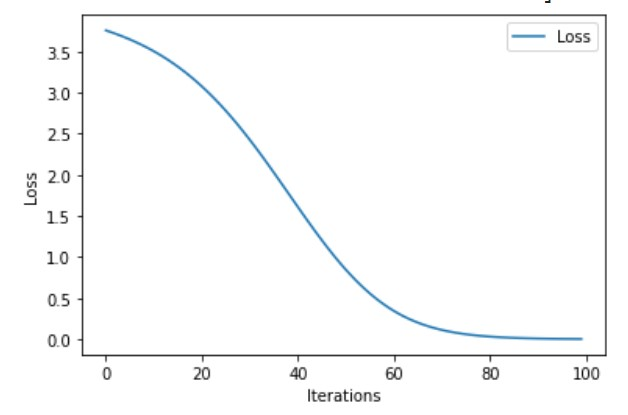

In [ ]:
# learning_rate = 0.1
# result as below

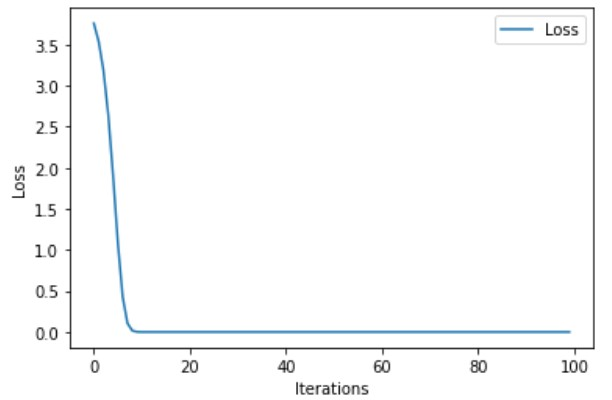

In [ ]:
# learning_rate = 0.005
# result as below

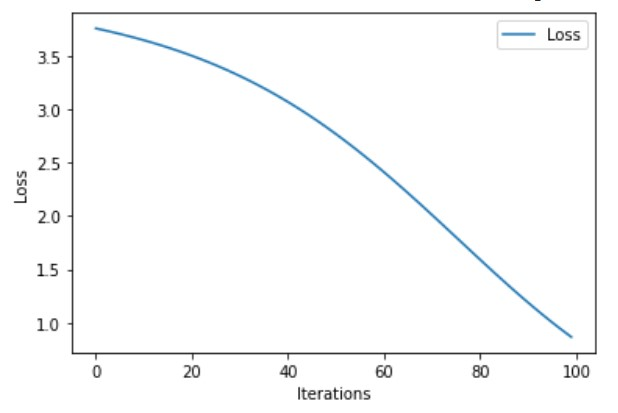